## pysparkTJhw05

还是用上节课的数据集，完成好友推荐：  
要求：两个人不是直接好友，但是有共同好友，这时就可以向各自推荐另一个为好友；  
结果集格式：A,(推荐好友列表） 

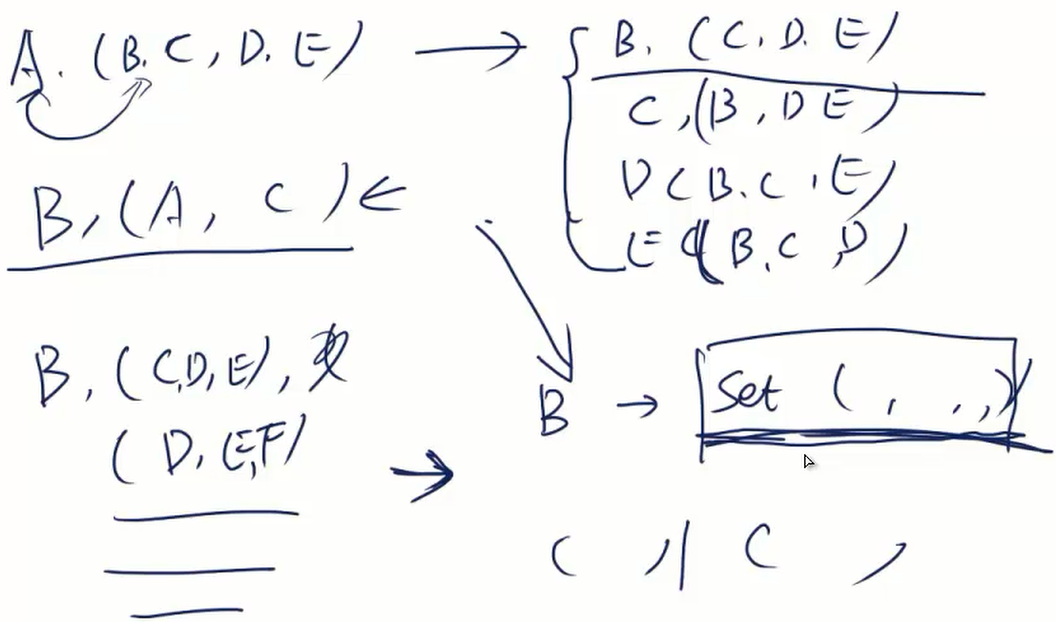  
老师的思路：得到A的好友列表，再得到A的共同好友列表，取个差集。比我的实现思路貌似要简单一点。

In [1]:
import pyspark
from pyspark.sql import SparkSession

In [2]:
#生成SparkSession实例
spark = SparkSession.builder \
     .master("local[*]") \
     .appName("pysparkTJhw05") \
     .config("spark.some.config.option", "some-value") \
     .getOrCreate()'file:///home/ian/code/github/LSCJcour

In [3]:
#通过sparkSession获取上下文
sc = spark.sparkContext

In [4]:
rdd1 = sc.textFile('file:///home/ian/code/github/LSCJcourses/pysparkTJ/friends.txt')

In [6]:
import itertools

### 得到共同好友列表

In [7]:
rdd2 = rdd1.map(lambda x:x.split('\t'))

rdd3 = rdd2.groupByKey().map(lambda x:(x[0],list(x[1])))

rdd4 = rdd3.flatMap(lambda x:[(i,x[0]) for i in list(itertools.combinations(x[1],2))])

rdd5 = rdd4.groupByKey().map(lambda x:(x[0],list(x[1])))

rdd5.take(5)

[(('0', '136593'), ['867923']),
 (('0', '523684'), ['867923']),
 (('0', '815602'), ['867923']),
 (('0', '835220'), ['867923']),
 (('0', '857527'), ['867923', '891835'])]

In [8]:
rdd2.take(5)

[['11342', '387543'],
 ['11342', '427436'],
 ['11342', '538214'],
 ['11342', '638706'],
 ['11342', '645018']]

In [10]:
['11342', '387543'] in rdd2.collect()

True

In [11]:
rdd6 = rdd5.map(lambda x:x[0])

In [14]:
#好友列表
f = rdd2.collect()

In [20]:
rdd7 = rdd6.filter(lambda x: x not in f and (x[1],x[0]) not in f)

In [21]:
rdd8 = rdd7.flatMap(lambda x:[(x[0],x[1]),(x[1],x[0])])

In [22]:
rdd9 = rdd8.groupByKey().mapValues(list)

In [23]:
rdd9.take(5)

[('0',
  ['136593',
   '523684',
   '815602',
   '835220',
   '857527',
   '891835',
   '112028',
   '235849',
   '302284',
   '417728',
   '693969',
   '867923',
   '438493',
   '11342',
   '414038',
   '500627',
   '760842',
   '846213',
   '451592',
   '91807',
   '322178',
   '387543',
   '535748',
   '695578']),
 ('136593',
  ['0',
   '523684',
   '815602',
   '835220',
   '857527',
   '891835',
   '11342',
   '414038',
   '500627',
   '760842',
   '846213']),
 ('523684',
  ['0',
   '136593',
   '815602',
   '835220',
   '857527',
   '891835',
   '11342',
   '414038',
   '500627',
   '760842',
   '846213']),
 ('815602',
  ['0',
   '136593',
   '523684',
   '835220',
   '857527',
   '891835',
   '11342',
   '414038',
   '500627',
   '760842',
   '846213']),
 ('835220',
  ['0',
   '136593',
   '523684',
   '815602',
   '857527',
   '891835',
   '427436',
   '638706',
   '856657',
   '867923',
   '11342',
   '414038',
   '500627',
   '760842',
   '846213',
   '387543',
   '538214',
 

## end

## end

## end

## end

## end